## 1.1 Data Overviews

> Name of dataset: Zanado (Clothing, Shoes, Devices,...)

## 1.2 Attribute-information
>	product_id-Unique product id

>	product_name-Name of product

>	sale_offs-

>	sales_prices

>	origin_prices

>	purchases

>	num_raters

>	ratings

>	categories_str

>	category_id

## 1.3 EDA

In [154]:
#import libraries
import pandas as pd
import numpy as np  
import json
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [155]:
data=pd.read_csv('dataset.csv')
data.head()

,product_id,product_names,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,categories_str,category_id
0,0,Áo khoác nam Akuba -3307 - Xanh,NaN,NaN,520000,165,1,80,Áo khoác,0
1,1,Áo khoác Bomber Nam Nữ 1980 phong cách - Xanh đen,0.31,165000.0,239000,521,13,86,Áo khoác,0
2,2,Áo khoác nam nữ chống tia UV xám thể thao - A,0.29,375000.0,525000,180,4,80,Áo khoác,0
3,3,Áo khoác nam nữ AW phong cách - Đỏ đô,0.31,165000.0,239000,183,1,80,Áo khoác,0
4,4,Áo khoác unisex phối chữ cá tính - Trắng,0.34,179000.0,270000,326,3,87,Áo khoác,0


In [156]:
# Thống kê giá trị độc nhất ở mỗi column
data.apply(lambda x: len(x.unique()))

product_id        2307
product_names     2256
sale_offs           55
sales_prices       246
origin_prices      388
purchases          356
num_raters          51
ratings             13
categories_str      13
category_id         13
dtype: int64

In [157]:
data.describe()

,product_id,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,category_id
count,2307.000000,1905.000000,1.905000e+03,2.307000e+03,2307.000000,2307.000000,2307.000000,2307.000000
mean,1153.000000,0.325428,2.529189e+05,3.808754e+05,314.935414,4.074989,80.760295,5.568704
std,666.117857,0.096936,1.803858e+05,2.602164e+05,534.432165,17.953636,3.368676,3.727250
min,0.000000,0.010000,7.000000e+04,9.900000e+04,2.000000,1.000000,80.000000,0.000000
25%,576.500000,0.290000,1.450000e+05,2.390000e+05,178.000000,1.000000,80.000000,2.000000
50%,1153.000000,0.340000,2.050000e+05,3.200000e+05,228.000000,1.000000,80.000000,6.000000
75%,1729.500000,0.380000,2.980000e+05,4.500000e+05,283.500000,1.000000,80.000000,8.000000
max,2306.000000,0.770000,2.110000e+06,3.014000e+06,9418.000000,515.000000,100.000000,12.000000


## 1.4 Feature Engineering

In [158]:
#length of product_names
name_len=[len(x) for x in data["product_names"]]
data["name_len"]=name_len

#length of categories_str
category_len=[len(x) for x in data["categories_str"]]
data["category_len"]=category_len

In [159]:
data.head()

,product_id,product_names,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,categories_str,category_id,name_len,category_len
0,0,Áo khoác nam Akuba -3307 - Xanh,NaN,NaN,520000,165,1,80,Áo khoác,0,31,8
1,1,Áo khoác Bomber Nam Nữ 1980 phong cách - Xanh đen,0.31,165000.0,239000,521,13,86,Áo khoác,0,49,8
2,2,Áo khoác nam nữ chống tia UV xám thể thao - A,0.29,375000.0,525000,180,4,80,Áo khoác,0,45,8
3,3,Áo khoác nam nữ AW phong cách - Đỏ đô,0.31,165000.0,239000,183,1,80,Áo khoác,0,37,8
4,4,Áo khoác unisex phối chữ cá tính - Trắng,0.34,179000.0,270000,326,3,87,Áo khoác,0,40,8


### Correlation Matrix

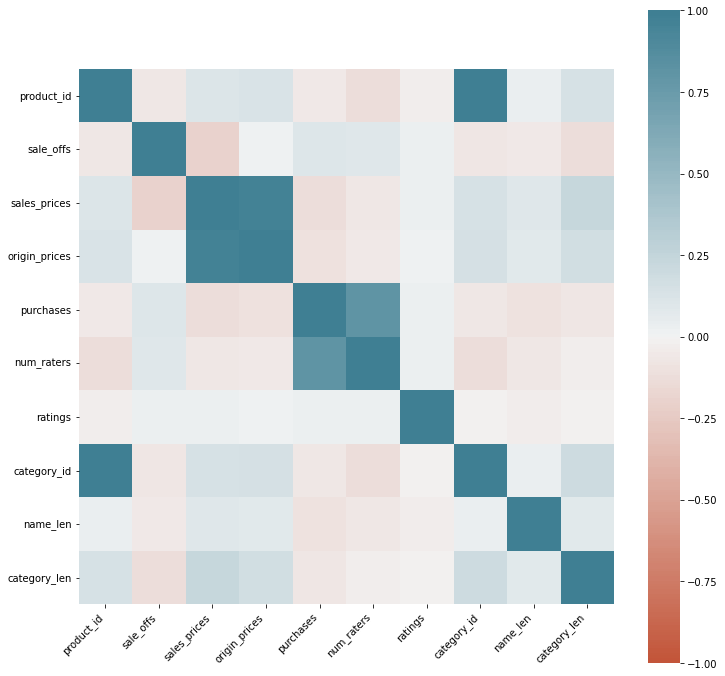

In [160]:
corr = data.corr()
plt.figure(figsize=(12, 12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Pair plots

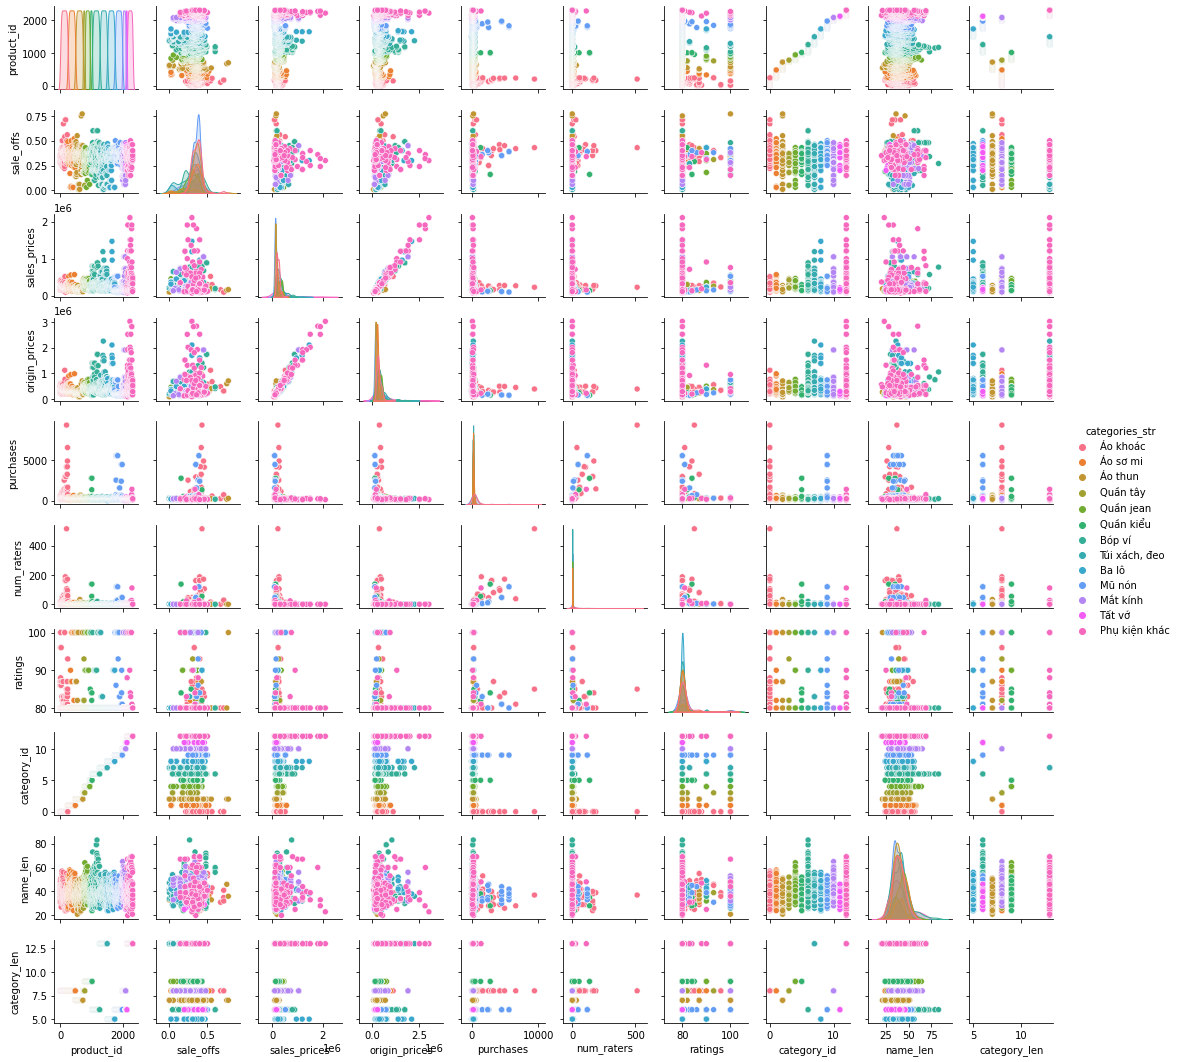

In [161]:
sns.pairplot(data, hue='categories_str', height=1.5)

### Catplot

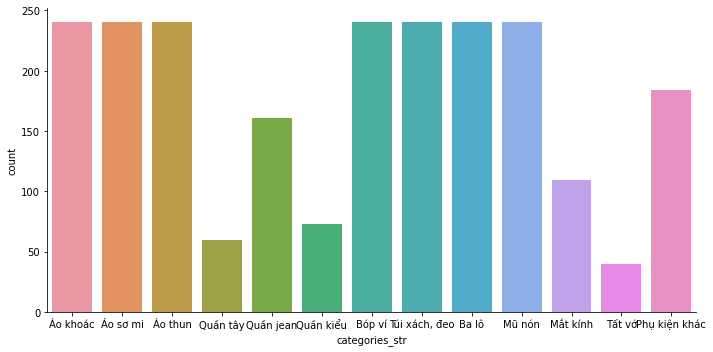

In [162]:
# Số lượng mặt hàng theo từng loại hàng
sns.catplot(x = "categories_str", data=data, aspect=2, kind="count")
# sns.factorplot(x = "categories_str", data=data, aspect=2, kind="count")

In [163]:
# data[['categories_str', 'category_id']].drop_duplicates()

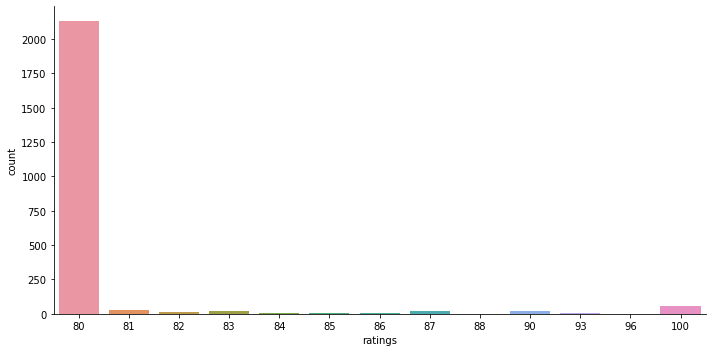

In [164]:
# Số lượng đánh giá theo từng cấp độ
sns.catplot(x = "ratings", data=data, aspect=2, kind="count")

### Histplot và Distplot

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_raters', ylabel='Density'>

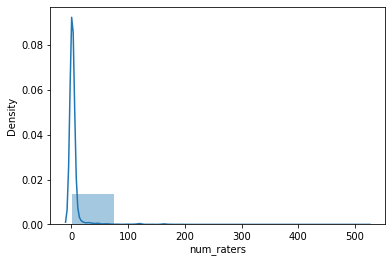

In [165]:
sns.distplot(data['num_raters'], bins= 7) # bins: chia ra thành bins cột

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='purchases', ylabel='Density'>

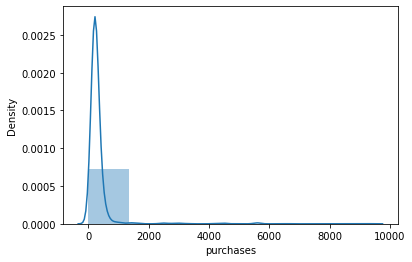

In [166]:
sns.distplot(data['purchases'], bins= 7) # bins: chia ra thành bins cột

c:\Users\LENOVO\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sale_offs', ylabel='Density'>

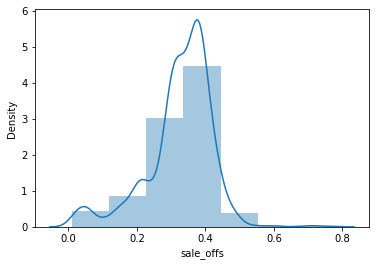

In [167]:
sns.distplot(data['sale_offs'], bins= 7) # bins: chia ra thành bins cột

### Joint distributions

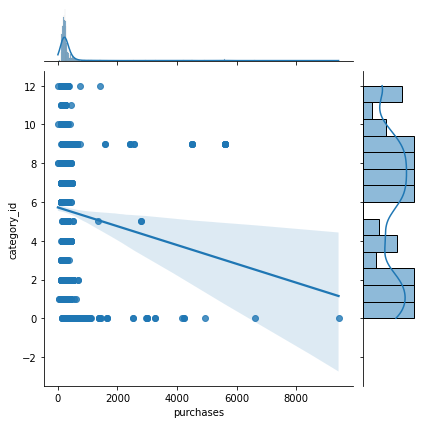

In [168]:
sns.jointplot(x= 'purchases', y= 'category_id', kind= 'reg', data= data)

### Heat map

In [169]:
data.corr()

,product_id,sale_offs,sales_prices,origin_prices,purchases,num_raters,ratings,category_id,name_len,category_len
product_id,1.000000,-0.065078,0.113797,0.127881,-0.054059,-0.120165,-0.024295,0.990905,0.031935,0.146681
sale_offs,-0.065078,1.000000,-0.202360,0.008441,0.108973,0.092614,0.028931,-0.071599,-0.059606,-0.126244
sales_prices,0.113797,-0.202360,1.000000,0.968440,-0.124511,-0.067795,0.027817,0.145103,0.089323,0.231031
origin_prices,0.127881,0.008441,0.968440,1.000000,-0.106129,-0.051493,0.012145,0.155129,0.083775,0.178336
purchases,-0.054059,0.108973,-0.124511,-0.106129,1.000000,0.816050,0.027518,-0.069601,-0.086967,-0.075967
num_raters,-0.120165,0.092614,-0.067795,-0.051493,0.816050,1.000000,0.029838,-0.125125,-0.066410,-0.026418
ratings,-0.024295,0.028931,0.027817,0.012145,0.027518,0.029838,1.000000,-0.021327,-0.037218,-0.014069
category_id,0.990905,-0.071599,0.145103,0.155129,-0.069601,-0.125125,-0.021327,1.000000,0.032651,0.188044
name_len,0.031935,-0.059606,0.089323,0.083775,-0.086967,-0.066410,-0.037218,0.032651,1.000000,0.081410
category_len,0.146681,-0.126244,0.231031,0.178336,-0.075967,-0.026418,-0.014069,0.188044,0.081410,1.000000


<AxesSubplot:>

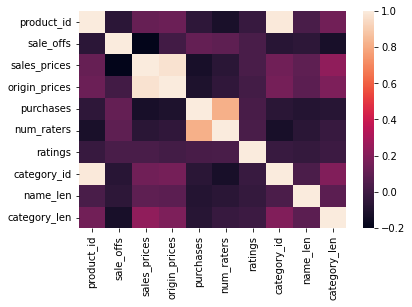

In [170]:
sns.heatmap(data.corr())

### Pie Char

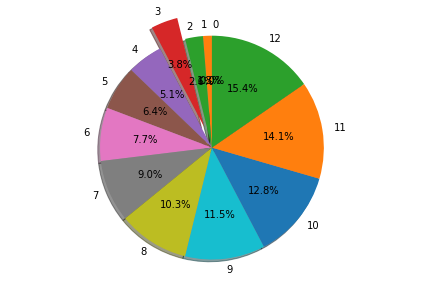

In [171]:
# Pie chart
labels = []
sizes = []
explode = []

labels = data['category_id'].value_counts().index.sort_values()
for index, size in enumerate(labels):
    sizes.append(size)
    if size==3:
        explode.append(0.2)
    else:
        explode.append(0)
 
_, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## 1.6 Xử lý dữ liệu trống

In [172]:
data.isnull().sum()

product_id          0
product_names       0
sale_offs         402
sales_prices      402
origin_prices       0
purchases           0
num_raters          0
ratings             0
categories_str      0
category_id         0
name_len            0
category_len        0
dtype: int64

In [173]:
def get_std_before_and_after(method, before, after):    
# in ra do lech chuan truoc va sau khi dien du lieu trong
    print('***' + method + '***')
    print('before filled na: ' , before.std())
    print('after filled na: ' , after.std())

In [174]:
def probability_density_function(old_data, new_data):
    # ve ham mat do xac suat cua cot Age truoc va sau khi dien du lieu trong
    fig = plt.figure()
    ax = fig.add_subplot(111)
    old_data.plot(kind='kde', color='blue')
    new_data.plot(kind='kde', color='red')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

0.32542782152230976
***Mean***
before filled na:  0.09693592574657901
after filled na:  0.08808228709480846


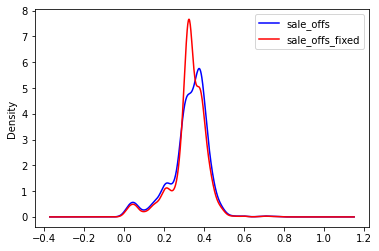

In [175]:
# chỉ cần thay đổi kĩ thuật xử lí
sale_offs_fixed = data['sale_offs'].mean()
print(sale_offs_fixed)
data['sale_offs_fixed'] = data['sale_offs'].fillna(sale_offs_fixed)
probability_density_function(data['sale_offs'], data['sale_offs_fixed'])
get_std_before_and_after('Mean',data['sale_offs'], data['sale_offs_fixed'] )

252918.89763779528
***Median***
before filled na:  180385.7811812106
after filled na:  163910.25353554665


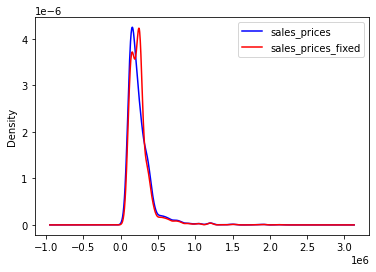

In [176]:
sales_prices_fixed = data['sales_prices'].mean()
print(sales_prices_fixed)
data['sales_prices_fixed'] = data['sales_prices'].fillna(sales_prices_fixed)
probability_density_function(data['sales_prices'], data['sales_prices_fixed'])
get_std_before_and_after('Median', data['sales_prices'], data['sales_prices_fixed'] )

## 1.7 Xử lí dữ liệu ngoại lệ

In [177]:
# hàm vẽ histogram để nhận biết dạng phân bố
def histogram(data):
    fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
    n_bins=30
    ax0.hist(data['sale_offs'], n_bins,  histtype='bar')
    ax0.set_title('sale_offs')
    ax1.hist(data['sales_prices'], n_bins,  histtype='bar')
    ax1.set_title('sales_prices')
    ax2.hist(data['origin_prices'], n_bins, histtype='bar')
    ax2.set_title('origin_prices')
    ax3.hist(data['purchases'], n_bins , histtype='bar')
    ax3.set_title('purchases')
    # ax4.hist(data['num_raters'], n_bins , histtype='bar')
    # ax4.set_title('num_raters')
    # ax5.hist(data['ratings'], n_bins , histtype='bar')
    # ax5.set_title('ratings')

    fig.tight_layout()
    plt.show()

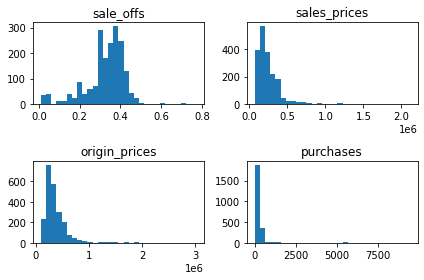

In [178]:
histogram(data)

##### Dữ liệu của cột sale_offs có dạng phân bố chuẩn nên ta có: 
* ==> + Biên trên = GTTB + 3*Độ lệch chuẩn
* ==> + Biên dưới =  GTTB - 3*Độ lệch chuẩn

In [179]:
# Xử lý ngoại lệ cho cột sale_offs
ub_sale_offs = data['sale_offs'].mean() + 3 * data['sale_offs'].std()
lb_sale_offs = data['sale_offs'].mean() - 3 * data['sale_offs'].std()
print(ub_sale_offs)
print(lb_sale_offs)

0.6162355987620468
0.034620044282572704


##### Dữ liệu của cột sales_prices, origin_prices, purchases, num_raters, ratings có dạng phân bố lệch (skewed) nên ta có: 
* ==> + Biên trên = 3rd Quantile + 3*IQR
* ==> + Biên dưới =  1st Quantile - 3*IQR
* IQR: Interquantile range
    * 3rd Quantile = Percentile 75
    * 1st Quantile = Percentile 25

In [180]:
# Xử lý ngoại lệ cho cột sales_prices
IQR_sales_prices = data['sales_prices'].quantile(0.75) - data['sales_prices'].quantile(0.25)  
ub_sales_prices = data['sales_prices'].quantile(0.75) + 3 * IQR_sales_prices 
lb_sales_prices = data['sales_prices'].quantile(0.25) - 3 * IQR_sales_prices 
print(ub_sales_prices)
print(lb_sales_prices)

757000.0
-314000.0


In [181]:
# Xử lý ngoại lệ cho cột origin_prices
IQR_origin_prices = data['origin_prices'].quantile(0.75) - data['origin_prices'].quantile(0.25)  
ub_origin_prices = data['origin_prices'].quantile(0.75) + 3 * IQR_origin_prices
lb_origin_prices = data['origin_prices'].quantile(0.25) - 3 * IQR_origin_prices
print(ub_origin_prices)
print(lb_origin_prices)

1083000.0
-394000.0


In [182]:
# Xử lý ngoại lệ cho cột purchases
IQR_purchases = data['purchases'].quantile(0.75) - data['purchases'].quantile(0.25)  
ub_purchases = data['purchases'].quantile(0.75) + 3 * IQR_purchases
lb_purchases = data['purchases'].quantile(0.25) - 3 * IQR_purchases
print(ub_purchases)
print(lb_purchases)

600.0
-138.5


In [183]:
# # Xử lý ngoại lệ cho cột num_raters
# IQR_num_raters = data['num_raters'].quantile(0.75) - data['num_raters'].quantile(0.25)  
# ub_num_raters = data['num_raters'].quantile(0.75) + 3 * IQR_num_raters
# lb_num_raters = data['num_raters'].quantile(0.25) - 3 * IQR_num_raters
# print(ub_num_raters)
# print(lb_num_raters)

In [184]:
# # Xử lý ngoại lệ cho cột ratings
# IQR_ratings = data['ratings'].quantile(0.75) - data['ratings'].quantile(0.25)  
# ub_ratings = data['ratings'].quantile(0.75) + 3 * IQR_ratings
# lb_ratings = data['ratings'].quantile(0.25) - 3 * IQR_ratings
# print(ub_ratings)
# print(lb_ratings)

In [185]:
# mang du lieu da qua xu li ngoai le
data_copy = data.copy()
# mang du lieu chua qua xu li ngoai le
data_copy_non_pr = data.copy()

In [186]:
# Xác định các giá trị biên trên và biên dưới của dữ liệu
# Thay thế giá trị ngoại lệ bằng 1 trong 2 giá trị trên
data_copy.loc[data_copy['sale_offs'] >= ub_sale_offs, 'sale_offs'] = ub_sale_offs
data_copy.loc[data_copy['sales_prices'] >= ub_sales_prices, 'sales_prices'] = ub_sales_prices
data_copy.loc[data_copy['origin_prices'] >= ub_origin_prices, 'origin_prices'] = ub_origin_prices
data_copy.loc[data_copy['purchases'] >= ub_purchases, 'purchases'] = ub_purchases
# data_copy.loc[data_copy['num_raters'] >= ub_num_raters, 'num_raters'] = ub_num_raters
# data_copy.loc[data_copy['ratings'] >= ub_ratings, 'ratings'] = ub_ratings


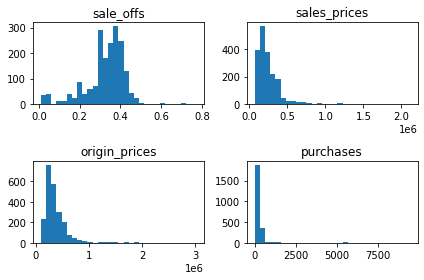

In [187]:
histogram(data)

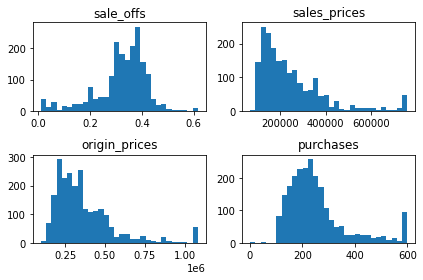

In [188]:
histogram(data_copy)